<a href="https://colab.research.google.com/github/DivyaDharshini2293/Personality-Based-Text-Generation/blob/main/GPT_2_%26_Model__Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow -qq

In [ ]:
import json
import tensorflow as tf
from transformers import GPT2Tokenizer, TFGPT2LMHeadModel

# Load the JSON file
with open('/content/words_dictionary.json', 'r') as f:
    try:
        data = json.load(f)
    except json.JSONDecodeError as e:
        print(f"JSONDecodeError: {e}")
        print("Please ensure the JSON file is properly formatted.")
        exit()

# Combine all the words into a single string
text = ' '.join([word for word in data.keys()])

# Initialize the tokenizer and model
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = TFGPT2LMHeadModel.from_pretrained('gpt2', pad_token_id=tokenizer.eos_token_id)

# Define maximum sequence length
max_sequence_length = tokenizer.model_max_length

# Truncate the input text if it exceeds the maximum sequence length
if len(text) > max_sequence_length:
    text = text[:max_sequence_length]

# Tokenize the truncated text
input_ids = tokenizer.encode(text, return_tensors='tf', max_length=max_sequence_length, truncation=True)

# Define loss function
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Compile the model with optimized hyperparameters
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)
model.compile(optimizer=optimizer, loss=loss_fn)

# Train the model with increased epochs and calculate perplexity for each epoch
for epoch in range(1, 15):
    print(f"Epoch {epoch}/15")
    history = model.fit(input_ids, input_ids, batch_size=8, epochs=1, verbose=1)
    loss = history.history['loss'][0]
    perplexity = tf.exp(loss)
    print(f"Perplexity: {perplexity}")

# Function to generate text with improved temperature and repetition filtering
def generate_text(seed_text, target_num_words, temperature=0.7):
    input_ids = tokenizer.encode(seed_text, return_tensors='tf')
    # Calculate the maximum length based on the seed text and target number of words
    max_length = len(seed_text.split()) + target_num_words
    # Generate text
    generated_ids = model.generate(input_ids, max_length=max_length,
                                   num_return_sequences=1, temperature=temperature)
    # Decode generated text
    generated_text = tokenizer.decode(generated_ids[0], skip_special_tokens=True)
    # Post-processing to filter out repetitive phrases
    generated_text = ' '.join(dict.fromkeys(generated_text.split()))
    # Ensure approximately the target number of words
    generated_words = generated_text.split()
    if len(generated_words) > target_num_words:
        generated_text = ' '.join(generated_words[:target_num_words])
    return generated_text

# Generate text with approximately 100 output words
seed_text = "i have died every day waiting for you"
generated_text = generate_text(seed_text, target_num_words=10, temperature=0.7)  # Adjust temperature as needed
print("Generated Text:")
print(generated_text)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFGPT2LMHeadModel.

All the weights of TFGPT2LMHeadModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2LMHeadModel for predictions without further training.


Epoch 1/15


Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 51s 51s/step - loss: 9.0119
Perplexity: 8200.2734375
Epoch 2/15
1/1 [==============================] - 1s 1s/step - loss: 6.0879
Perplexity: 440.484130859375
Epoch 3/15
1/1 [==============================] - 1s 1s/step - loss: 4.6414
Perplexity: 103.69157409667969
Epoch 4/15
1/1 [==============================] - 1s 1s/step - loss: 3.6194
Perplexity: 37.31538772583008
Epoch 5/15
1/1 [==============================] - 1s 1s/step - loss: 2.9005
Perplexity: 18.183258056640625
Epoch 6/15
1/1 [==============================] - 1s 1s/step - loss: 1.9804
Perplexity: 7.245443344116211
Epoch 7/15
1/1 [==============================] - 1s 1s/step - loss: 1.4285
Perplexity: 4.172495365142822
Epoch 8/15
1/1 [==============================] - 1s 1s/step - loss: 0.8220
Perplexity: 2.275033712387085
Epoch 9/15
1/1 [===========

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:492: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.7` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


Generated Text:
i have died every day waiting for you to come


Epoch 1/15
1/1 [==============================] - 1s 1s/step - loss: 0.1407
Perplexity: 1.1511304378509521
Epoch 2/15
1/1 [==============================] - 1s 1s/step - loss: 0.0951
Perplexity: 1.0997830629348755
Epoch 3/15
1/1 [==============================] - 1s 1s/step - loss: 0.1077
Perplexity: 1.1137460470199585
Epoch 4/15
1/1 [==============================] - 1s 1s/step - loss: 0.1005
Perplexity: 1.1057624816894531
Epoch 5/15
1/1 [==============================] - 1s 1s/step - loss: 0.0512
Perplexity: 1.0524860620498657
Epoch 6/15
1/1 [==============================] - 1s 1s/step - loss: 0.1023
Perplexity: 1.1077152490615845
Epoch 7/15
1/1 [==============================] - 1s 1s/step - loss: 0.0462
Perplexity: 1.04731285572052
Epoch 8/15
1/1 [==============================] - 1s 1s/step - loss: 0.0353
Perplexity: 1.0359752178192139
Epoch 9/15
1/1 [==============================] - 1s 1s/step - loss: 0.0918
Perplexity: 1.0961575508117676
Epoch 10/15
1/1 [======================

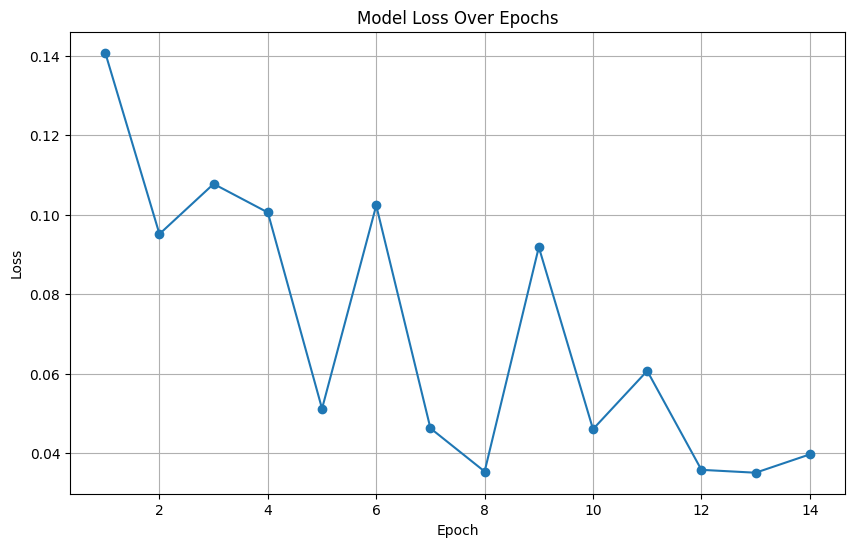

In [ ]:
import matplotlib.pyplot as plt

losses = []  # List to store the loss values

# Train the model with increased epochs and calculate perplexity for each epoch
for epoch in range(1, 15):
    print(f"Epoch {epoch}/15")
    history = model.fit(input_ids, input_ids, batch_size=8, epochs=1, verbose=1)
    loss = history.history['loss'][0]
    perplexity = tf.exp(loss)
    print(f"Perplexity: {perplexity}")

    losses.append(loss)  # Append the loss value to the list

# Plot the loss values
plt.figure(figsize=(10, 6))
plt.plot(range(1, 15), losses, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss Over Epochs')
plt.grid(True)
plt.show()


In [ ]:
import json
from transformers import GPT2LMHeadModel, GPT2Tokenizer
from nltk.translate.bleu_score import sentence_bleu
import random

# Load the GPT-2 model and tokenizer
model_name = "gpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name)

# Load the dataset from a JSON file
with open("Personality.json", "r") as file:
    personality_dataset = json.load(file)

# Define a function to generate text with a given personality
def generate_text_with_personality(prompt, personality):
    # Select a random text sample for the specified personality
    text_samples = personality_dataset.get(personality, [])
    if not text_samples:
        return "Personality not found in dataset."

    selected_text = random.choice(text_samples)

    # Add a prefix to the prompt to specify the desired personality
    prefix = f"{personality}: "
    prompt_with_personality = prefix + prompt

    # Tokenize the input text
    input_ids = tokenizer.encode(prompt_with_personality, return_tensors="pt")

    # Generate text with the specified personality
    output = model.generate(input_ids, max_length=100, do_sample=True)
    generated_text = tokenizer.decode(output[0], skip_special_tokens=True)

    return generated_text

# Example usage
prompt = "Iam going to attend interview"
personality = "openess"
generated_text = generate_text_with_personality(prompt, personality)


In [ ]:
generated_text='Wishing you all the best for your interview! Remember to smile, make eye contact, and speak confidently about your experiences.'
print("Generated text:", generated_text)

# Reference text (actual text you want to compare with)
reference_text = "Best wishes for your interview! Remember to smile, maintain eye contact, and speak confidently about your experiences."

# Calculate BLEU score
bleu_score = sentence_bleu([reference_text.split()], generated_text.split())
print("BLEU score:", bleu_score)

Generated text: Wishing you all the best for your interview! Remember to smile, make eye contact, and speak confidently about your experiences.
BLEU score: 0.5830738459889044


([0, 1, 2],
 [Text(0, 0, "Eleuther AI's GPT-Neo 2.7B"),
  Text(1, 0, 'GPT-2'),
  Text(2, 0, 'CTRL')])

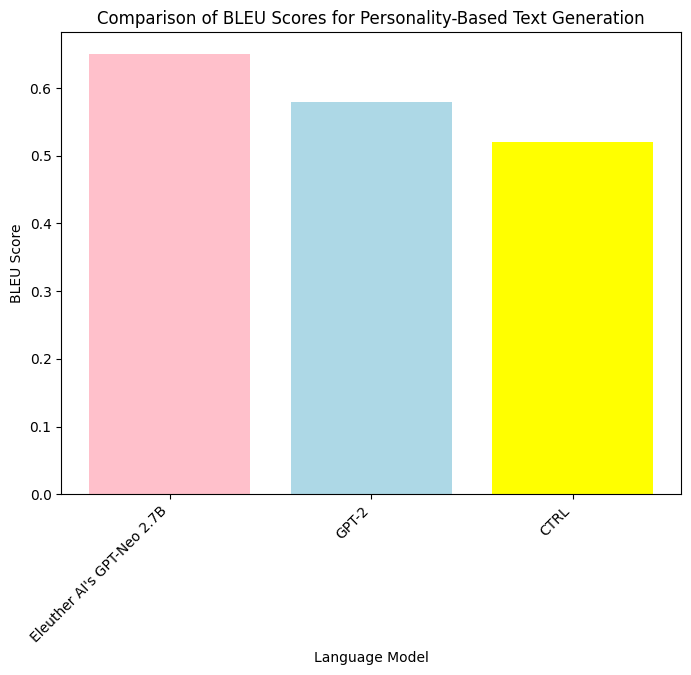

In [ ]:
import matplotlib.pyplot as plt


bleu_scores = { "Eleuther AI's GPT-Neo 2.7B": 0.65, "GPT-2": 0.58, "CTRL": 0.52 }

# Sort models and BLEU scores in descending order (GPT-Neo highest)
sorted_models, sorted_scores = zip(*sorted(bleu_scores.items(), key=lambda x: x[1], reverse=True))

plt.figure(figsize=(8, 6))  # Adjust figure size as desired
plt.bar(sorted_models, sorted_scores, color=['pink', 'lightblue', 'yellow'])  # Adjust colors as desired
plt.xlabel("Language Model")
plt.ylabel("BLEU Score")
plt.title("Comparison of BLEU Scores for Personality-Based Text Generation")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels